In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [10]:
import scipy.io
import h5py
import copy
import pathlib

In [25]:
dir_load = pathlib.Path(r'/media/rich/bigSSD/other lab data/ShiYi labeled_cells_for_Rich').resolve()
fileName_load = r'trainingData_L23_171216.mat'
path_load = dir_load / fileName_load

import h5py
with h5py.File(path_load, 'r') as f:
    print(list(f.keys()))
#     data = copy.deepcopy(f)
    data = [f[key][()] for key in f.keys()]

['alignedMasks', 'augmentedClass', 'augmentedInd', 'augmentedMasks', 'realLabels']


In [46]:
data[4].shape

(1, 35771)

<IPython.core.display.Javascript object>


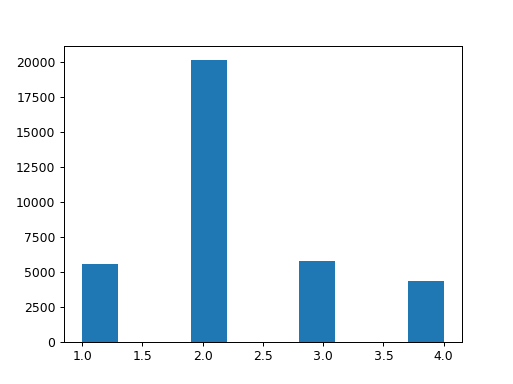

(array([ 5562.,     0.,     0., 20126.,     0.,     0.,  5756.,     0.,
            0.,  4327.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

In [48]:
plt.figure()
plt.hist(data[4].T, 10)

<IPython.core.display.Javascript object>


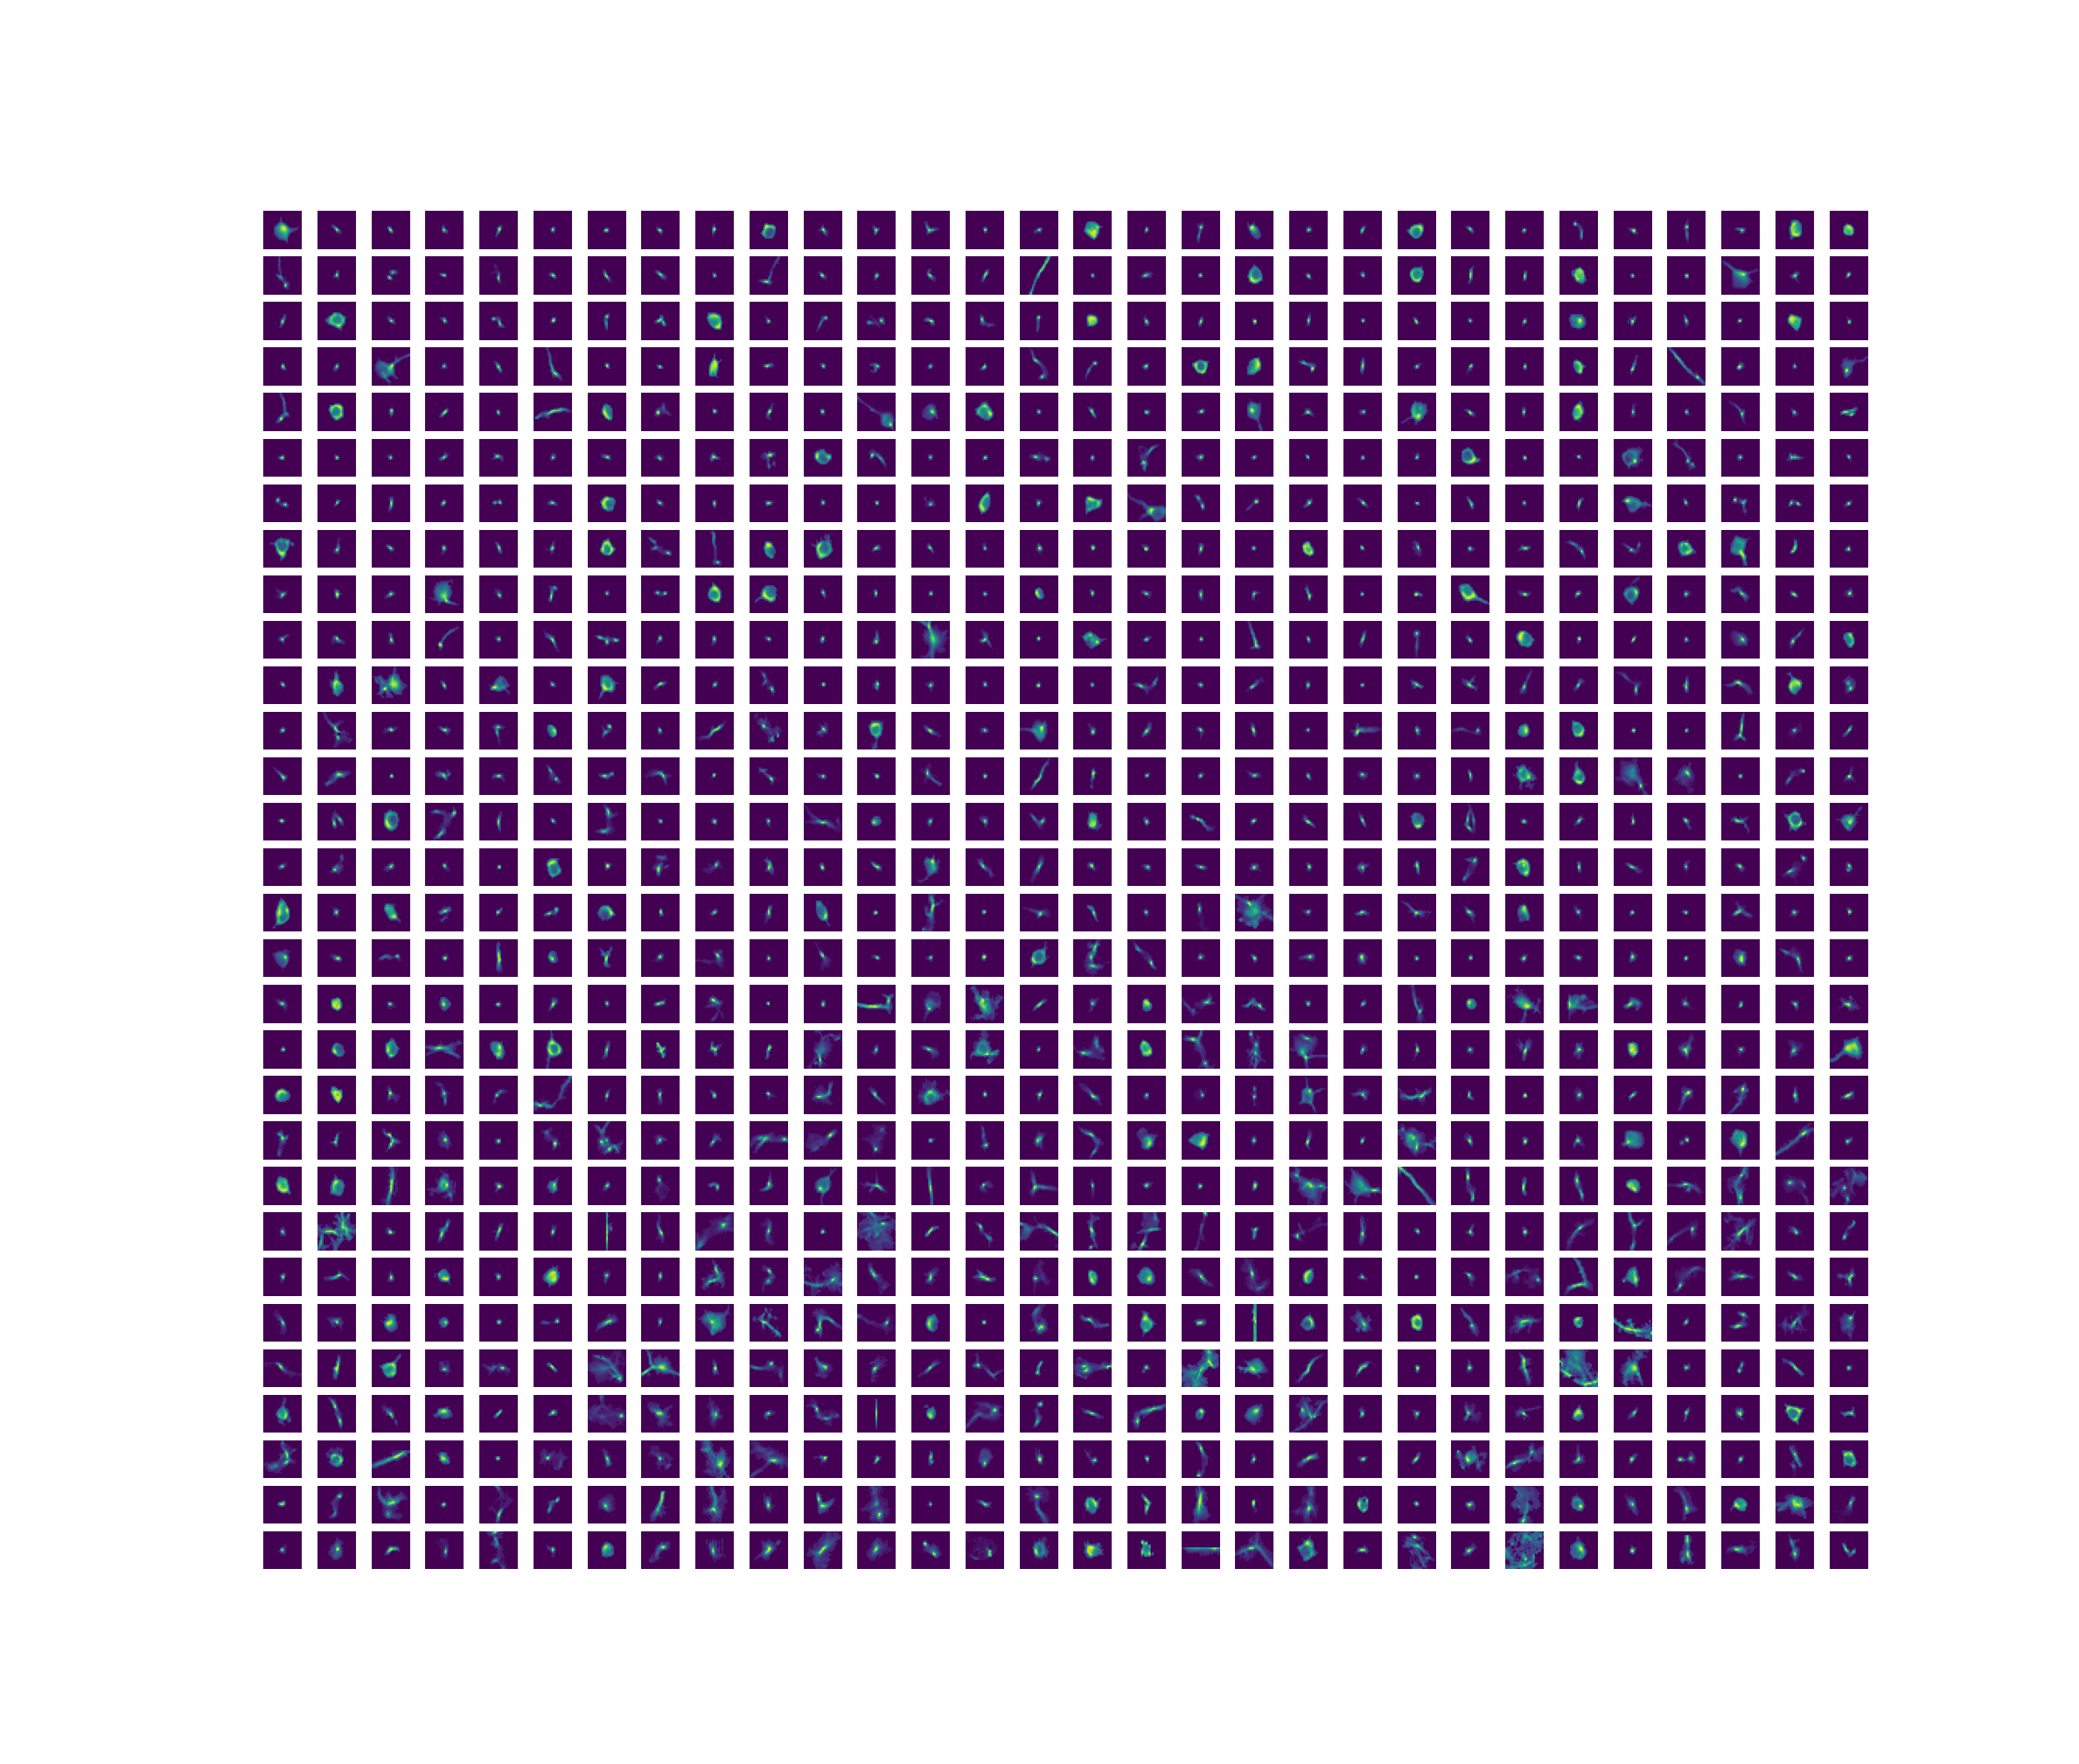

In [50]:
import matplotlib.pyplot as plt

%matplotlib notebook
fig, axs = plt.subplots(30,30)
for ii in range(axs.shape[0]):
    for jj in range(axs.shape[1]):
        axs[ii,jj].imshow(data[0][ii*30 + jj])
        axs[ii,jj].set_axis_off()

In [ ]:
import glob
import numpy as np
import pickle


def query_directory(base_dir=r'\\research.files.med.harvard.edu\Neurobio\MICROSCOPE\Rich\data\res2p\scanimage data',
                            query=r'stat.npy'):
    '''
    Find a file in a directory and its recursive subdirectories

    JZ 2021

    Args:
        base_dir: str
            The base directory in which to start the search
        query : str
            The file name to look for in the subdirectories of base_dir
    Returns:
        A list of strings of full path directories to files named like the given file in question
    '''
    sub_base_dir = base_dir + r'/' if base_dir[-2:] != '/' else base_dir

    traversal_list = []
    traversal_list.append(str(sub_base_dir))

    seen_values = []

    counter = 1

    while True:
        if len(traversal_list) == 0:
            break
        print(f'Currently Exploring Directory # {counter}')
        directory = traversal_list.pop(0)
        if query in directory:
            seen_values.append(directory)
        else:
            traversal_list.extend(glob.glob(str(directory + r'/*')))

        counter += 1

    return seen_values

result = query_directory()

paths_all = {}
for path in result:
    paths_all[path] = np.load(path, allow_pickle=True)
    
path_save = r'\\research.files.med.harvard.edu\Neurobio\MICROSCOPE\Rich\data\res2p\scanimage data\all_stat_files_20211022.pkl'
with open(path_save, 'wb') as file:
    pickle.dump(paths_all, file)